In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import warnings
import time
np.random.seed(34)
warnings.filterwarnings('ignore')

index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s-{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

dftrain = pd.read_csv("C:/Users/Ayush Ayan/Desktop/CMAPSSData/train_FD001.txt",sep='\s+',header=None,index_col=False,names=col_names)
dfvalid = pd.read_csv("C:/Users/Ayush Ayan/Desktop/CMAPSSData/test_FD001.txt",sep='\s+',header=None,index_col=False,names=col_names)
df_rulvalid = pd.read_csv("C:/Users/Ayush Ayan/Desktop/CMAPSSData/RUL_FD001.txt",sep='\s+',header=None,index_col=False,names=['RUL'])
dfvalid.shape

(13096, 26)

In [89]:
train = dftrain.copy()
valid = dfvalid.copy()

train

unit_number  time_cycles  setting_1  setting_2  setting_3     s-1  \
0                1            1    -0.0007    -0.0004      100.0  518.67   
1                1            2     0.0019    -0.0003      100.0  518.67   
2                1            3    -0.0043     0.0003      100.0  518.67   
3                1            4     0.0007     0.0000      100.0  518.67   
4                1            5    -0.0019    -0.0002      100.0  518.67   
...            ...          ...        ...        ...        ...     ...   
20626          100          196    -0.0004    -0.0003      100.0  518.67   
20627          100          197    -0.0016    -0.0005      100.0  518.67   
20628          100          198     0.0004     0.0000      100.0  518.67   
20629          100          199    -0.0011     0.0003      100.0  518.67   
20630          100          200    -0.0032    -0.0005      100.0  518.67   

          s-2      s-3      s-4    s-5  ...    s-12     s-13     s-14    s-15  \
0      641.82  1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195   
1      642.15  1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318   
2      642.35  1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178   
3      642.35  1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682   
4      642.37  1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294   
...       ...      ...      ...    ...  ...     ...      ...      ...     ...   
20626  643.49  1597.98  1428.63  14.62  ...  519.49  2388.26  8137.60  8.4956   
20627  643.54  1604.50  1433.58  14.62  ...  519.68  2388.22  8136.50  8.5139   
20628  643.42  1602.46  1428.18  14.62  ...  520.01  2388.24  8141.05  8.5646   
20629  643.23  1605.26  1426.53  14.62  ...  519.67  2388.23  8139.29  8.5389   
20630  643.85  1600.38  1432.14  14.62  ...  519.30  2388.26  8137.33  8.5036   

       s-16  s-17  s-18   s-19   s-20     s-21  
0      0.03   392  2388  100.0  39.06  23.4190  
1      0.03   392  2388  100.0  39.00  23.4236  
2      0.03   390  2388  100.0  38.95  23.3442  
3      0.03   392  2388  100.0  38.88  23.3739  
4      0.03   393  2388  100.0  38.90  23.4044  
...     ...   ...   ...    ...    ...      ...  
20626  0.03   397  2388  100.0  38.49  22.9735  
20627  0.03   395  2388  100.0  38.30  23.1594  
20628  0.03   398  2388  100.0  38.44  22.9333  
20629  0.03   395  2388  100.0  38.29  23.0640  
20630  0.03   396  2388  100.0  38.37  23.0522  

[20631 rows x 26 columns]

In [90]:
print('Total None values in the train dataset : ',train.isna().sum())

Total None values in the train dataset :  unit_number    0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
s-1            0
s-2            0
s-3            0
s-4            0
s-5            0
s-6            0
s-7            0
s-8            0
s-9            0
s-10           0
s-11           0
s-12           0
s-13           0
s-14           0
s-15           0
s-16           0
s-17           0
s-18           0
s-19           0
s-20           0
s-21           0
dtype: int64


In [91]:
train.loc[:,'s-1':].describe().transpose()

count         mean           std        min        25%        50%  \
s-1   20631.0   518.670000  0.000000e+00   518.6700   518.6700   518.6700   
s-2   20631.0   642.680934  5.000533e-01   641.2100   642.3250   642.6400   
s-3   20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600  1590.1000   
s-4   20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600  1408.0400   
s-5   20631.0    14.620000  1.776400e-15    14.6200    14.6200    14.6200   
s-6   20631.0    21.609803  1.388985e-03    21.6000    21.6100    21.6100   
s-7   20631.0   553.367711  8.850923e-01   549.8500   552.8100   553.4400   
s-8   20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500  2388.0900   
s-9   20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000  9060.6600   
s-10  20631.0     1.300000  0.000000e+00     1.3000     1.3000     1.3000   
s-11  20631.0    47.541168  2.670874e-01    46.8500    47.3500    47.5100   
s-12  20631.0   521.413470  7.375534e-01   518.6900   520.9600   521.4800   
s-13  20631.0  2388.096152  7.191892e-02  2387.8800  2388.0400  2388.0900   
s-14  20631.0  8143.752722  1.907618e+01  8099.9400  8133.2450  8140.5400   
s-15  20631.0     8.442146  3.750504e-02     8.3249     8.4149     8.4389   
s-16  20631.0     0.030000  1.387812e-17     0.0300     0.0300     0.0300   
s-17  20631.0   393.210654  1.548763e+00   388.0000   392.0000   393.0000   
s-18  20631.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000   
s-19  20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
s-20  20631.0    38.816271  1.807464e-01    38.1400    38.7000    38.8300   
s-21  20631.0    23.289705  1.082509e-01    22.8942    23.2218    23.2979   

            75%        max  
s-1    518.6700   518.6700  
s-2    643.0000   644.5300  
s-3   1594.3800  1616.9100  
s-4   1414.5550  1441.4900  
s-5     14.6200    14.6200  
s-6     21.6100    21.6100  
s-7    554.0100   556.0600  
s-8   2388.1400  2388.5600  
s-9   9069.4200  9244.5900  
s-10     1.3000     1.3000  
s-11    47.7000    48.5300  
s-12   521.9500   523.3800  
s-13  2388.1400  2388.5600  
s-14  8148.3100  8293.7200  
s-15     8.4656     8.5848  
s-16     0.0300     0.0300  
s-17   394.0000   400.0000  
s-18  2388.0000  2388.0000  
s-19   100.0000   100.0000  
s-20    38.9500    39.4300  
s-21    23.3668    23.6184

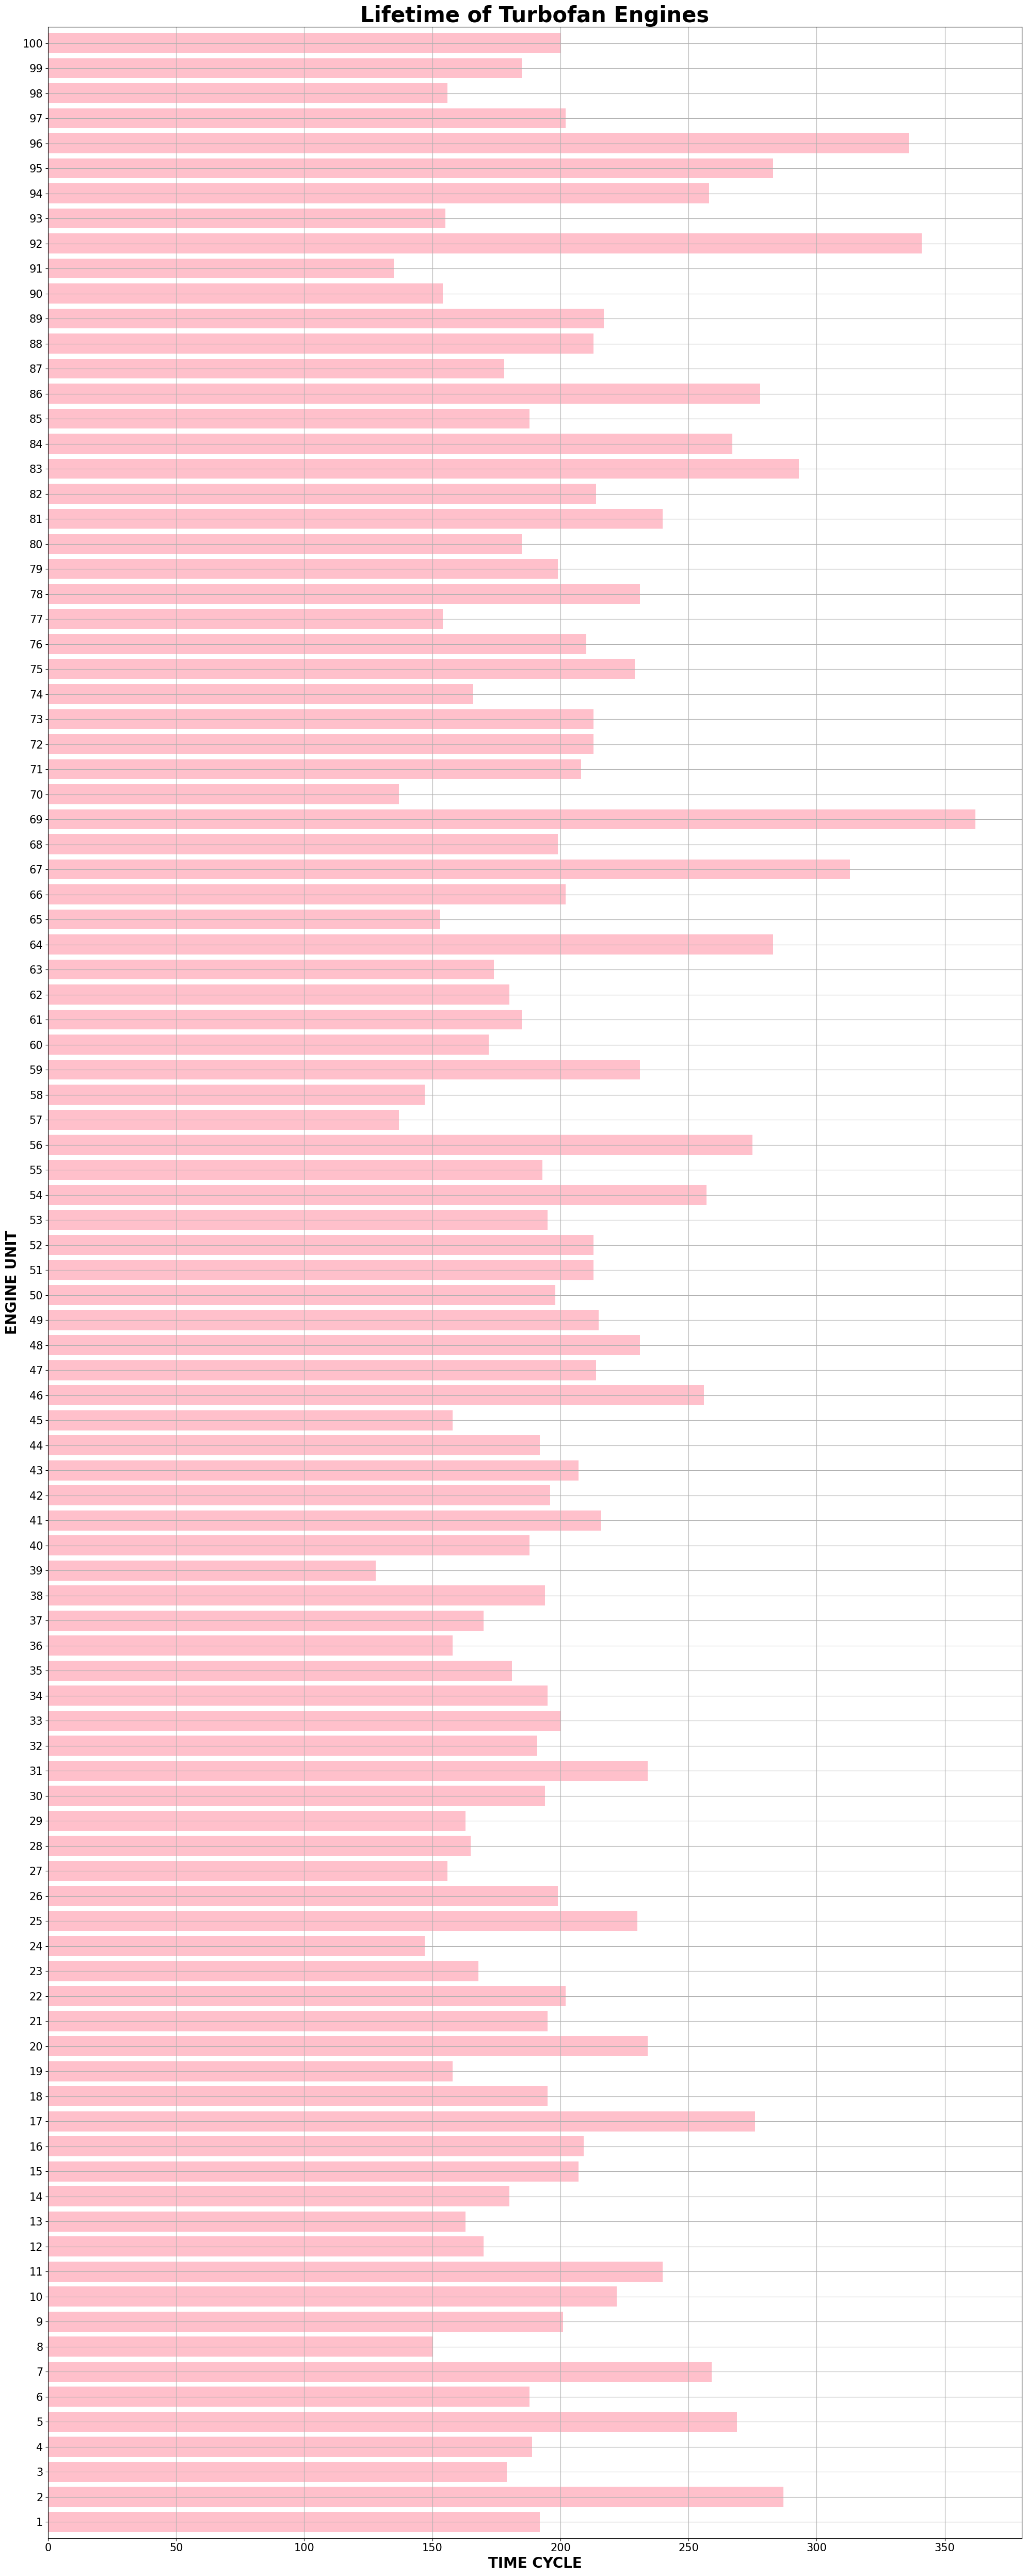

In [92]:
max_cycles=train[index_names].groupby('unit_number').max()
plt.figure(figsize=(20,50))
max_plot=max_cycles['time_cycles'].plot(kind='barh',width=0.8, stacked=True,align='center',color='pink')
plt.title('Lifetime of Turbofan Engines',fontweight='bold',size=30)
plt.xlabel('TIME CYCLE',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('ENGINE UNIT',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Slope:0.25,Intercept:193.72


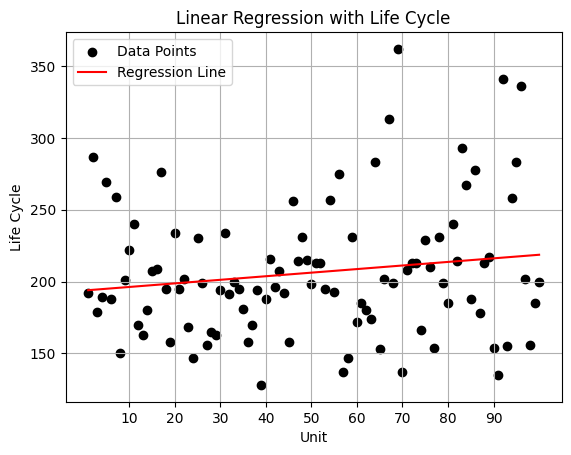

In [93]:
max_cycles=train[index_names].groupby('unit_number').max()
max_plot=max_cycles['time_cycles']

model=LinearRegression()
x = max_cycles.index.values.reshape(-1, 1) 
y = max_cycles['time_cycles'].values
model.fit(x, y)

slope=model.coef_[0]
intercept=model.intercept_
print(f"Slope:{slope:.2f},Intercept:{intercept:.2f}")

plt.scatter(x, y, color='black', label='Data Points')  
plt.plot(x, model.predict(x), color='red', label='Regression Line')  
plt.xlabel('Unit')
x_ticks = np.arange(10,100,10)
plt.xticks(x_ticks) 
plt.ylabel('Life Cycle')
plt.title('Linear Regression with Life Cycle')
plt.legend()
plt.grid(True)
plt.show()

In [94]:
def addingRUL_clmn(df):
    train_grouped_by_unit = df.groupby(by='unit_number') 
    max_time_cycles = train_grouped_by_unit['time_cycles'].max() 
    merged = df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
    merged = merged.drop("max_time_cycle", axis=1) 
    return merged
    

In [95]:
train = addingRUL_clmn(train)
train[['unit_number','RUL']]

unit_number  RUL
0                1  191
1                1  190
2                1  189
3                1  188
4                1  187
...            ...  ...
20626          100    4
20627          100    3
20628          100    2
20629          100    1
20630          100    0

[20631 rows x 2 columns]

In [96]:
rulmax=train.groupby('unit_number').max().reset_index()
rulmax.head()

unit_number  time_cycles  setting_1  setting_2  setting_3     s-1     s-2  \
0            1          192     0.0047     0.0005      100.0  518.67  644.21   
1            2          287     0.0076     0.0006      100.0  518.67  643.94   
2            3          179     0.0058     0.0005      100.0  518.67  643.93   
3            4          189     0.0059     0.0006      100.0  518.67  644.53   
4            5          269     0.0055     0.0005      100.0  518.67  644.02   

       s-3      s-4    s-5  ...     s-13     s-14    s-15  s-16  s-17  s-18  \
0  1605.44  1432.52  14.62  ...  2388.35  8140.58  8.5227  0.03   398  2388   
1  1610.10  1431.17  14.62  ...  2388.26  8175.57  8.5377  0.03   398  2388   
2  1606.50  1438.51  14.62  ...  2388.20  8255.34  8.5363  0.03   399  2388   
3  1612.11  1434.12  14.62  ...  2388.17  8259.42  8.5462  0.03   399  2388   
4  1609.41  1434.59  14.62  ...  2388.23  8215.19  8.5410  0.03   398  2388   

    s-19   s-20     s-21  RUL  
0  100.0  39.18  23.4999  191  
1  100.0  39.24  23.6005  286  
2  100.0  39.23  23.5181  178  
3  100.0  39.21  23.5074  188  
4  100.0  39.29  23.5503  268  

[5 rows x 27 columns]

In [97]:
Sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]

a=1
for i in dict_list :
    Sensor_dictionary['s-'+str(a)]=i
    a+=1
Sensor_dictionary

{'s-1': '(Fan inlet temperature) (◦R)',
 's-2': '(LPC outlet temperature) (◦R)',
 's-3': '(HPC outlet temperature) (◦R)',
 's-4': '(LPT outlet temperature) (◦R)',
 's-5': '(Fan inlet Pressure) (psia)',
 's-6': '(bypass-duct pressure) (psia)',
 's-7': '(HPC outlet pressure) (psia)',
 's-8': '(Physical fan speed) (rpm)',
 's-9': '(Physical core speed) (rpm)',
 's-10': '(Engine pressure ratio(P50/P2)',
 's-11': '(HPC outlet Static pressure) (psia)',
 's-12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 's-13': '(Corrected fan speed) (rpm)',
 's-14': '(Corrected core speed) (rpm)',
 's-15': '(Bypass Ratio) ',
 's-16': '(Burner fuel-air ratio)',
 's-17': '(Bleed Enthalpy)',
 's-18': '(Required fan speed)',
 's-19': '(Required fan conversion speed)',
 's-20': '(High-pressure turbines Cool air flow)',
 's-21': '(Low-pressure turbines Cool air flow)'}

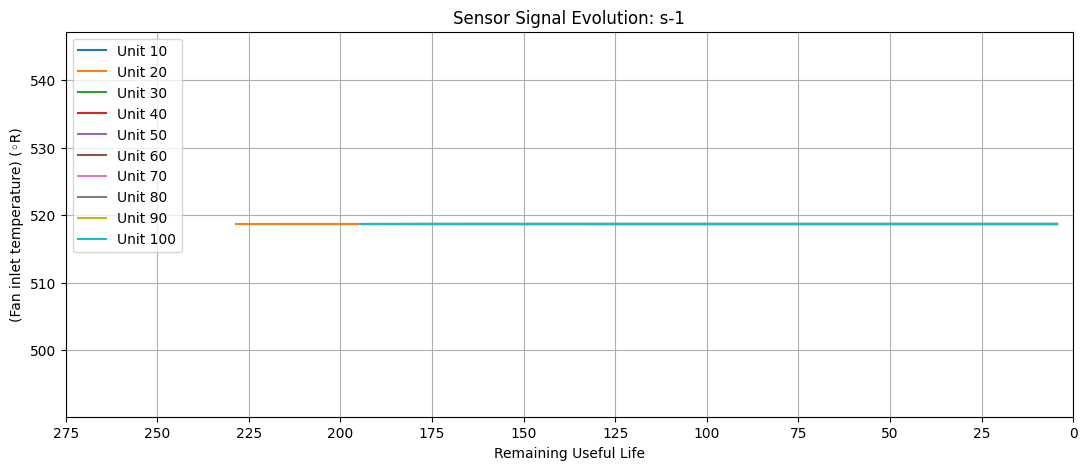

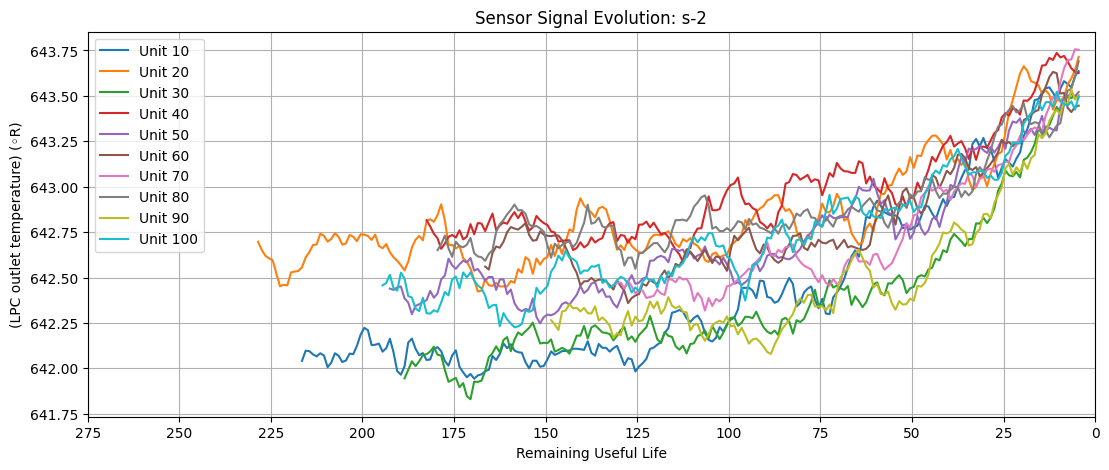

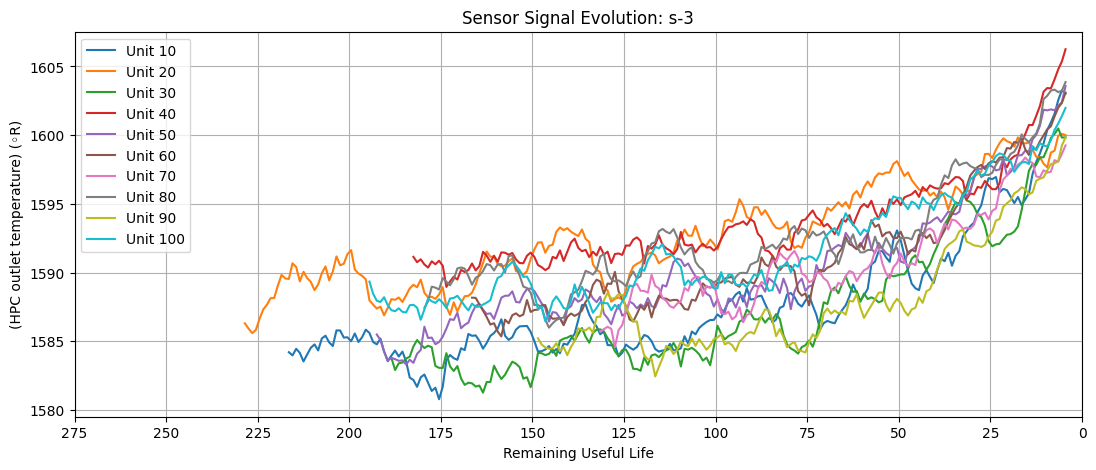

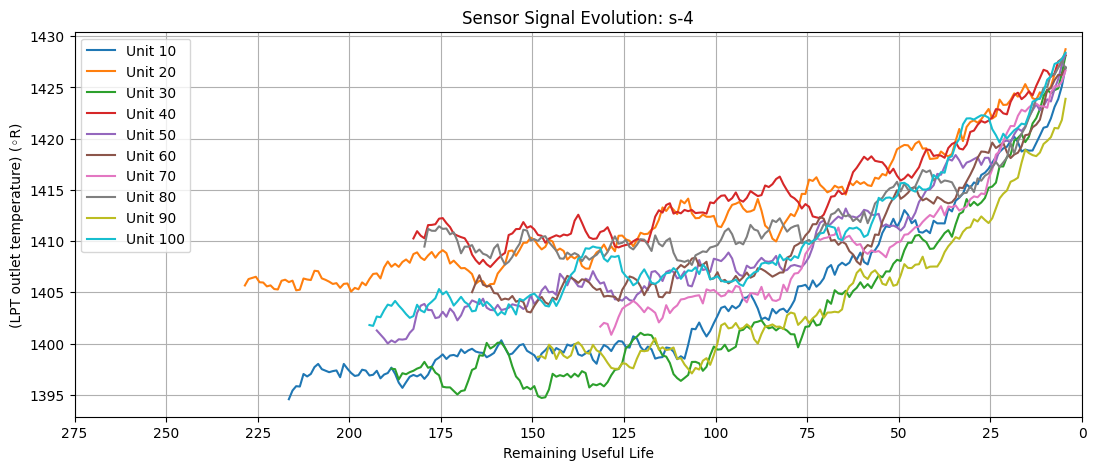

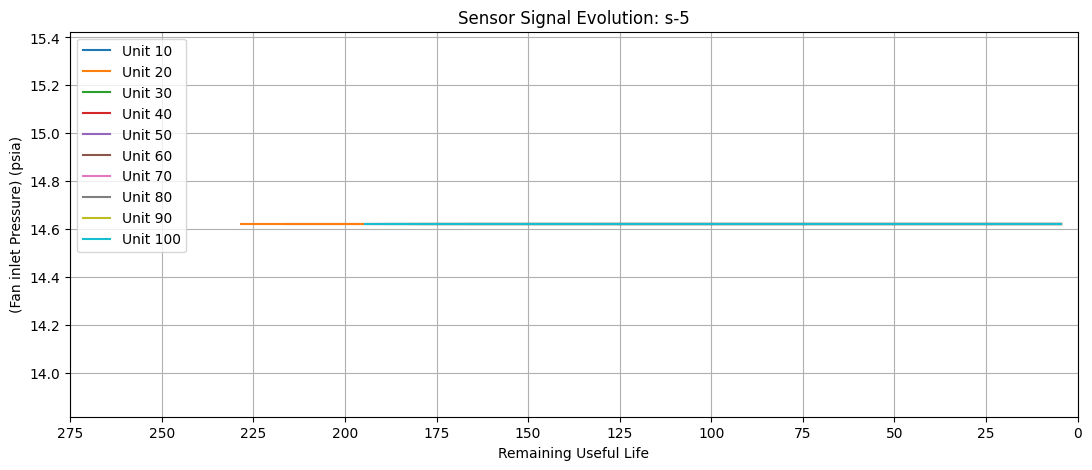

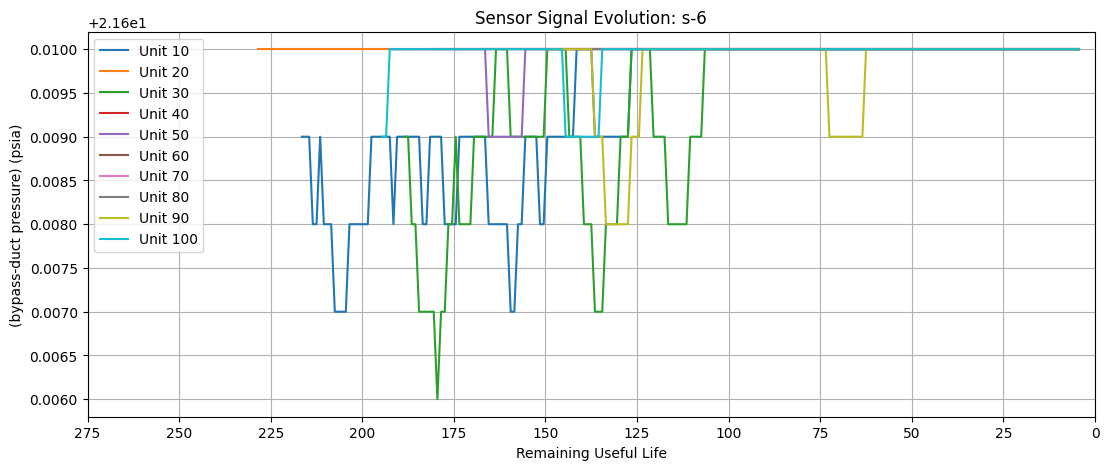

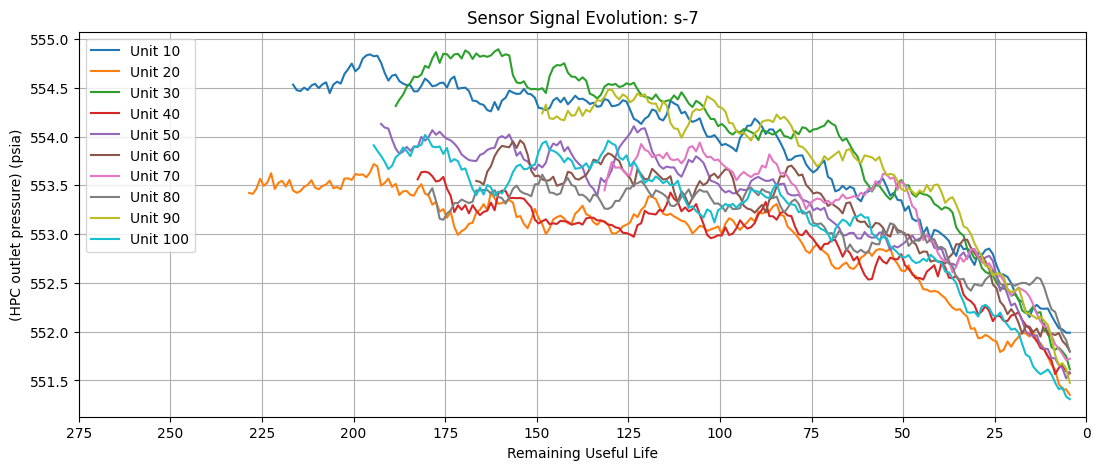

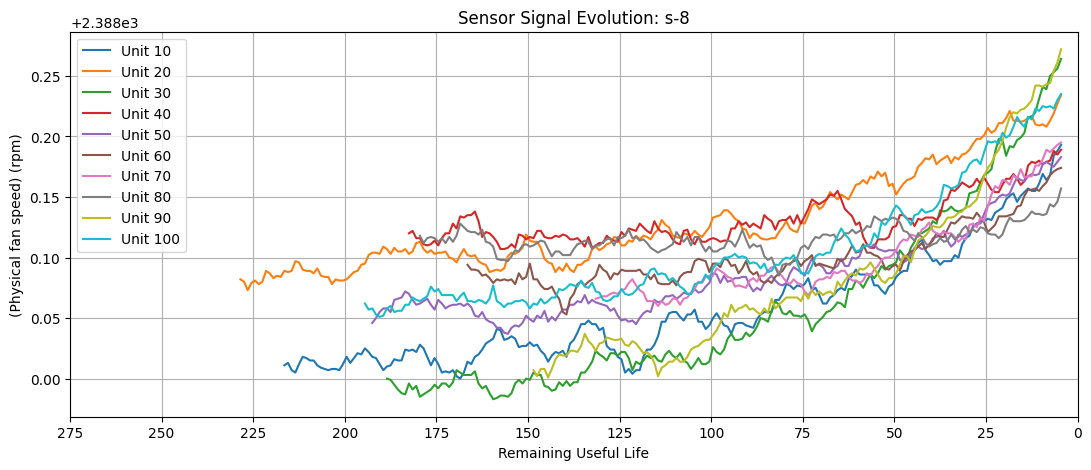

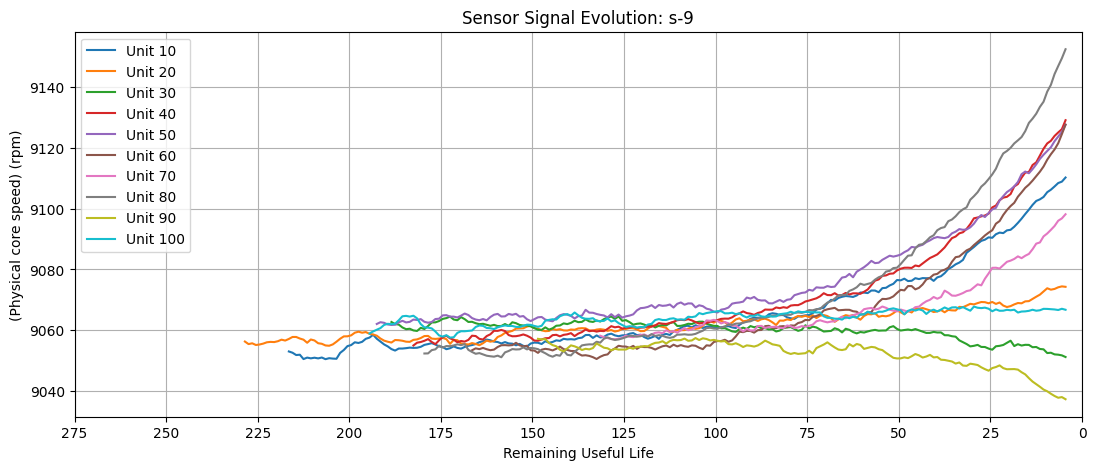

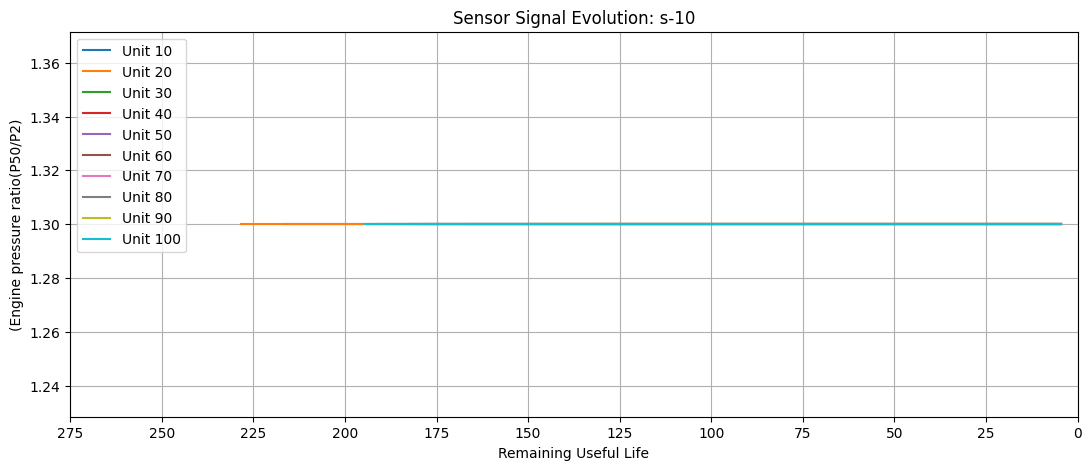

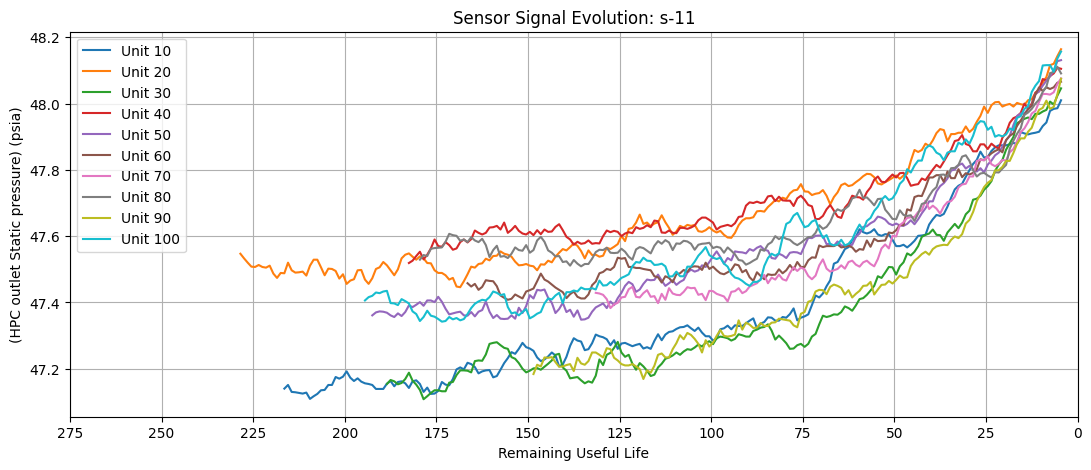

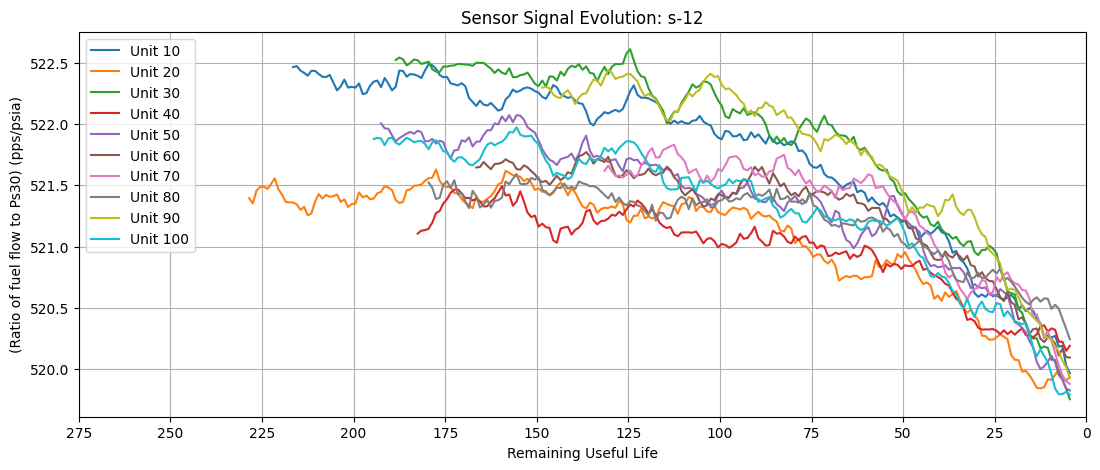

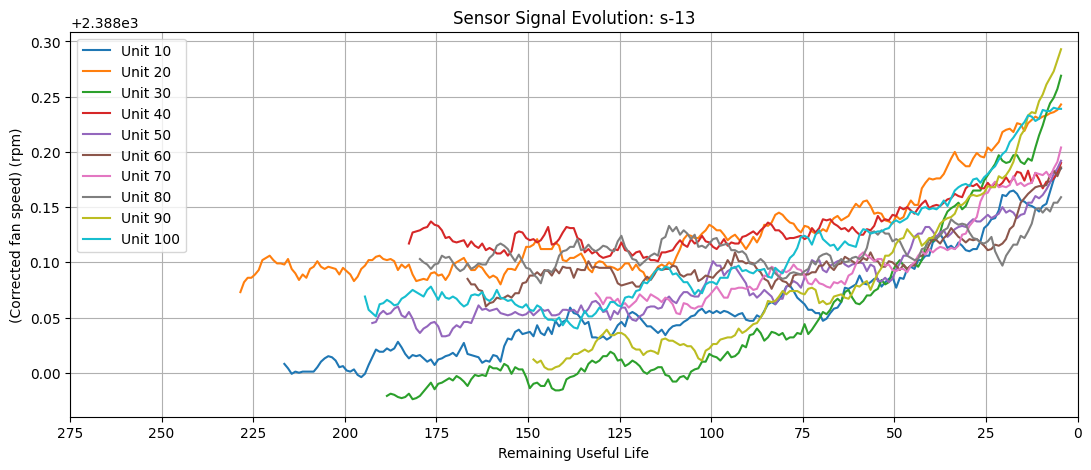

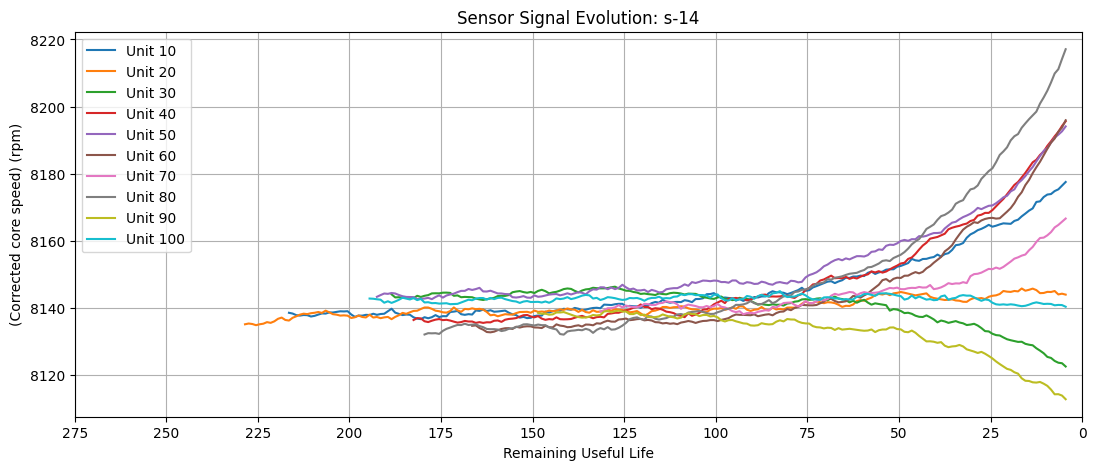

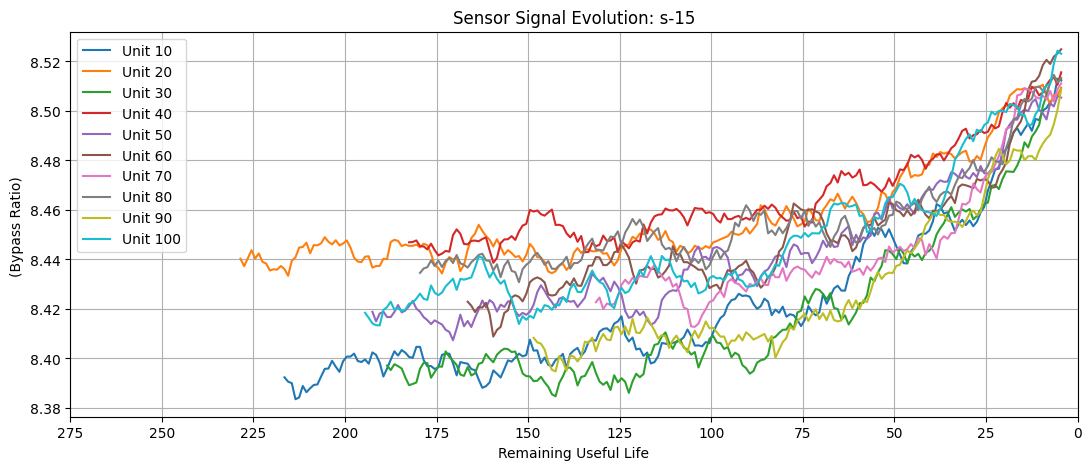

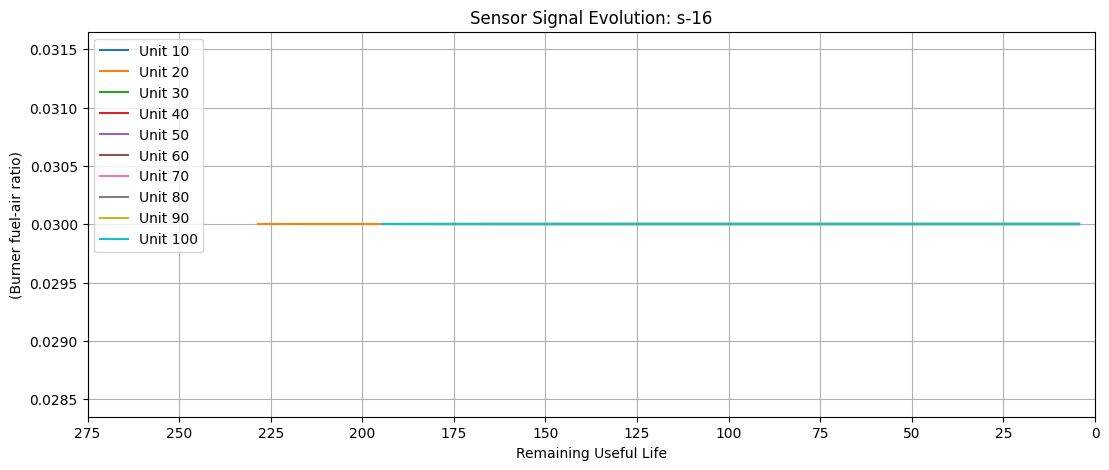

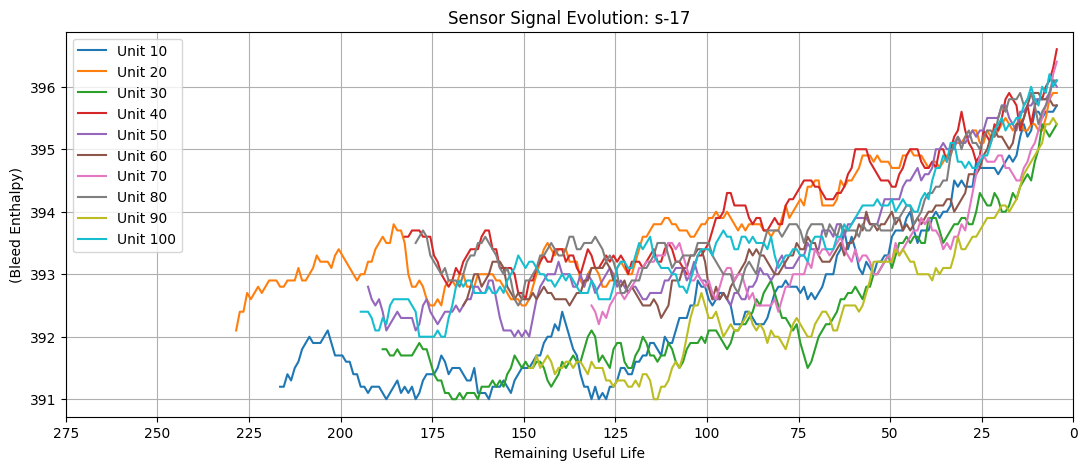

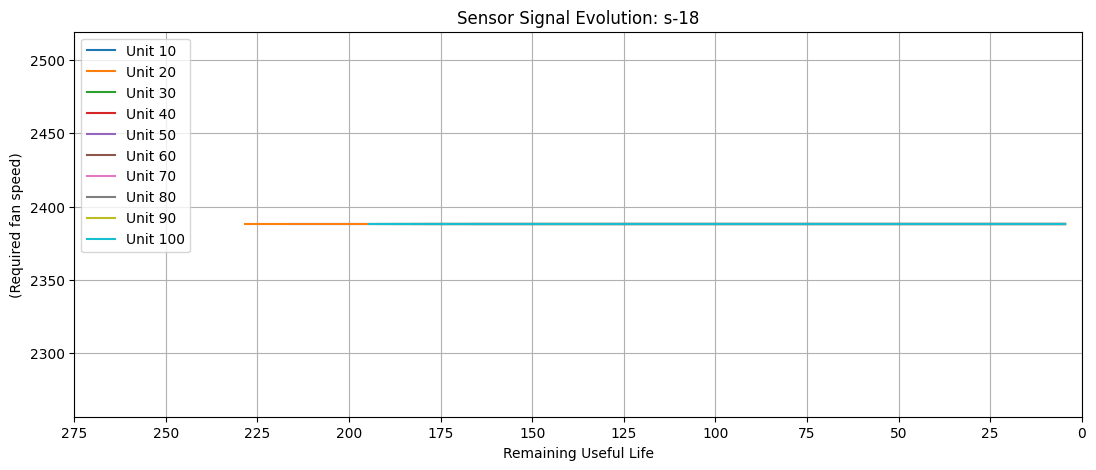

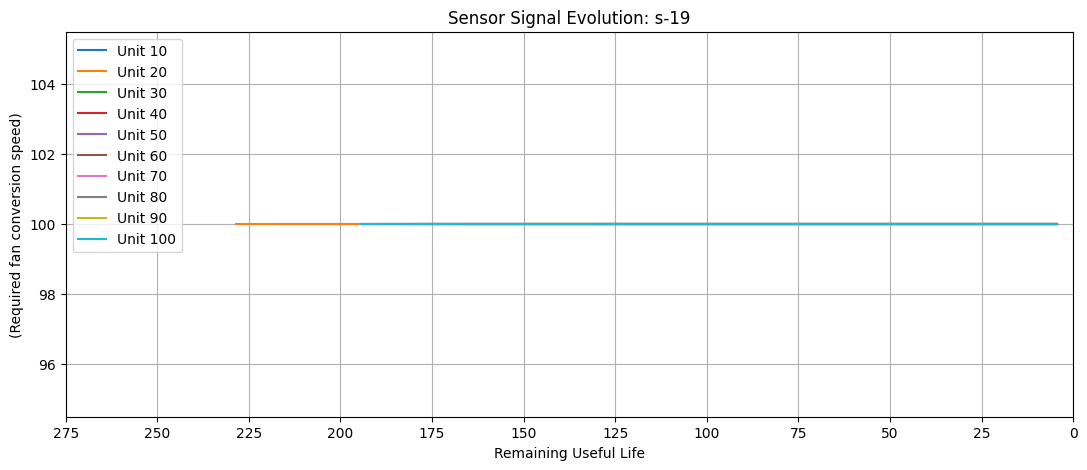

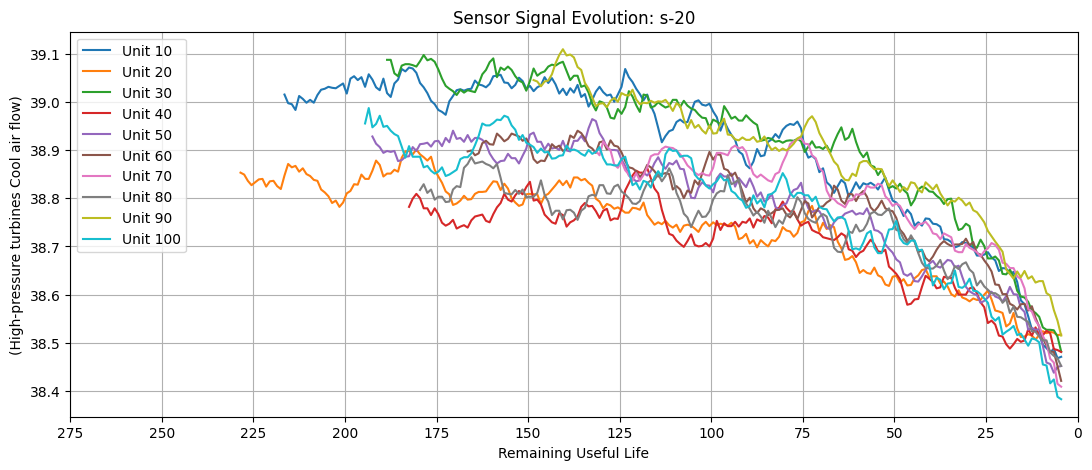

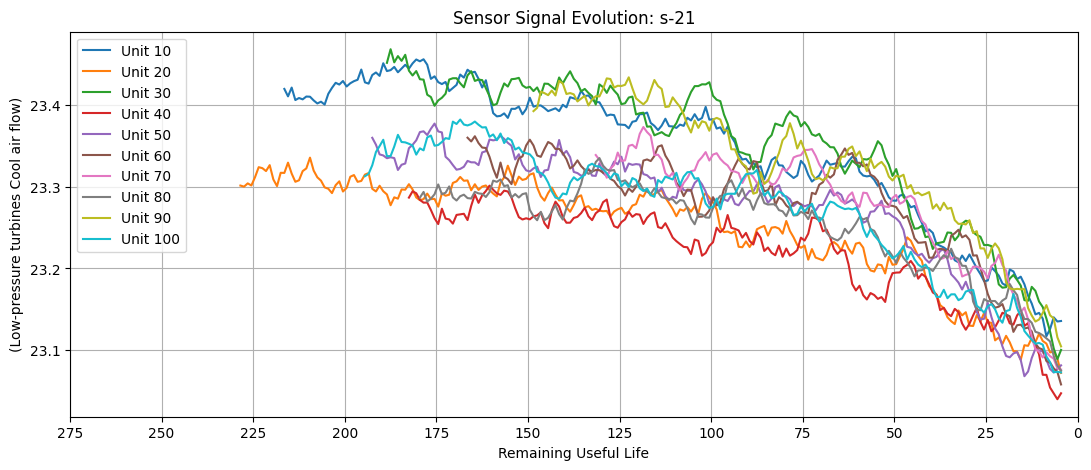

In [98]:
# NOW WE PLOT THE EVOLUTION OF SENSORS WITH THE EVOLUTION OF REMAINING USEFUL LIFE 

def plot_signal(df, Sensor_dic, signal_name):
    plt.figure(figsize=(13, 5))

    for i in df['unit_number'].unique():
        if (i % 10 == 0):
            data = df[df['unit_number'] == i].rolling(10).mean().dropna() #dropping NAN values if there exists any (precautionary)
            if signal_name in data.columns:
                plt.plot(data['RUL'], data[signal_name], label=f'Unit {i}')

    plt.xlim(250, 0)
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(Sensor_dic.get(signal_name, signal_name))
    plt.xlabel('Remaining Useful Life')
    plt.title(f"Sensor Signal Evolution: {signal_name}")
    plt.grid(True)
    plt.legend()
    plt.show()

for i in range(1,22):
    try:
        plot_signal(train, Sensor_dictionary,'s-'+str(i))
    except:
        pass

In [99]:
#THE GRAPHS ABOVE SHOW US THE SENSORS WHICH ARE CONSTANT W.R.T RUL. THESE SENSORS CAN BE DROPPED 

train.loc[:,'s-1':].describe().transpose()

count         mean           std        min        25%        50%  \
s-1   20631.0   518.670000  0.000000e+00   518.6700   518.6700   518.6700   
s-2   20631.0   642.680934  5.000533e-01   641.2100   642.3250   642.6400   
s-3   20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600  1590.1000   
s-4   20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600  1408.0400   
s-5   20631.0    14.620000  1.776400e-15    14.6200    14.6200    14.6200   
s-6   20631.0    21.609803  1.388985e-03    21.6000    21.6100    21.6100   
s-7   20631.0   553.367711  8.850923e-01   549.8500   552.8100   553.4400   
s-8   20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500  2388.0900   
s-9   20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000  9060.6600   
s-10  20631.0     1.300000  0.000000e+00     1.3000     1.3000     1.3000   
s-11  20631.0    47.541168  2.670874e-01    46.8500    47.3500    47.5100   
s-12  20631.0   521.413470  7.375534e-01   518.6900   520.9600   521.4800   
s-13  20631.0  2388.096152  7.191892e-02  2387.8800  2388.0400  2388.0900   
s-14  20631.0  8143.752722  1.907618e+01  8099.9400  8133.2450  8140.5400   
s-15  20631.0     8.442146  3.750504e-02     8.3249     8.4149     8.4389   
s-16  20631.0     0.030000  1.387812e-17     0.0300     0.0300     0.0300   
s-17  20631.0   393.210654  1.548763e+00   388.0000   392.0000   393.0000   
s-18  20631.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000   
s-19  20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
s-20  20631.0    38.816271  1.807464e-01    38.1400    38.7000    38.8300   
s-21  20631.0    23.289705  1.082509e-01    22.8942    23.2218    23.2979   
RUL   20631.0   107.807862  6.888099e+01     0.0000    51.0000   103.0000   

            75%        max  
s-1    518.6700   518.6700  
s-2    643.0000   644.5300  
s-3   1594.3800  1616.9100  
s-4   1414.5550  1441.4900  
s-5     14.6200    14.6200  
s-6     21.6100    21.6100  
s-7    554.0100   556.0600  
s-8   2388.1400  2388.5600  
s-9   9069.4200  9244.5900  
s-10     1.3000     1.3000  
s-11    47.7000    48.5300  
s-12   521.9500   523.3800  
s-13  2388.1400  2388.5600  
s-14  8148.3100  8293.7200  
s-15     8.4656     8.5848  
s-16     0.0300     0.0300  
s-17   394.0000   400.0000  
s-18  2388.0000  2388.0000  
s-19   100.0000   100.0000  
s-20    38.9500    39.4300  
s-21    23.3668    23.6184  
RUL    155.0000   361.0000

In [100]:
#DROPPING UNWANTED LABELS
from sklearn.model_selection import train_test_split
drop_labels = index_names+setting_names
X_train=train.drop(columns=drop_labels).copy()
X_train, X_test, y_train, y_test=train_test_split(X_train,X_train['RUL'], test_size=0.3, random_state=42)

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Droping the target variable
X_train.drop(columns=['RUL'], inplace=True)
X_test.drop(columns=['RUL'], inplace=True)
#Scaling X_train and X_test
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.fit_transform(X_test)
#Conserve only the last occurence of each unit to match the length of y_valid
X_valid = valid.groupby('unit_number').last().reset_index().drop(columns=drop_labels)
#scaling X_valid
X_valid_s=scaler.fit_transform(X_valid)

print(X_valid_s.shape)
# Adding the validation target variable from the RUL file
y_valid = df_rulvalid['RUL'].values
print(y_valid.shape)

(100, 21)
(100,)


In [102]:
print('maximum of y_train : ',y_train.max())
print('maximum of y_test : ',y_test.max())
print('maximum of y_valid : ',y_valid.max())

maximum of y_train :  361
maximum of y_test :  360
maximum of y_valid :  145


Testing Set Performance:
Mean Squared Error: 1968.09
R2 Score: 0.57
Predicted RUL on Validation Set using Random Forest:
[182.99 102.8   25.98  84.36 105.88 108.69  67.42  61.02  79.59  63.68
  41.72  51.53  55.55  90.52 166.86  97.02  26.19  47.67  95.62   8.09
  34.91 176.66 174.47   7.93 166.4   65.12 125.3   65.31  62.23  64.81
   4.89  29.29  64.45   3.22   3.02   5.59  27.18  25.76  91.7    7.9
  57.32   5.42  35.59  91.92  38.72  26.06 125.61  92.27   2.88  71.36
 107.37  14.46  14.42 139.03 140.12   6.04  78.48  27.42 174.77 105.81
  20.22  27.24  37.77  26.94  84.67   3.08 173.24   4.63 188.6   87.14
  80.37  44.89 165.83  59.43 186.64   2.2   18.1   98.59 120.6   49.92
   1.45   1.83 103.49  34.45  89.72  46.63 168.94 176.45 100.29  15.13
  15.41   5.02  26.48  22.03 162.92  92.11  47.72  55.13  79.35  10.54]


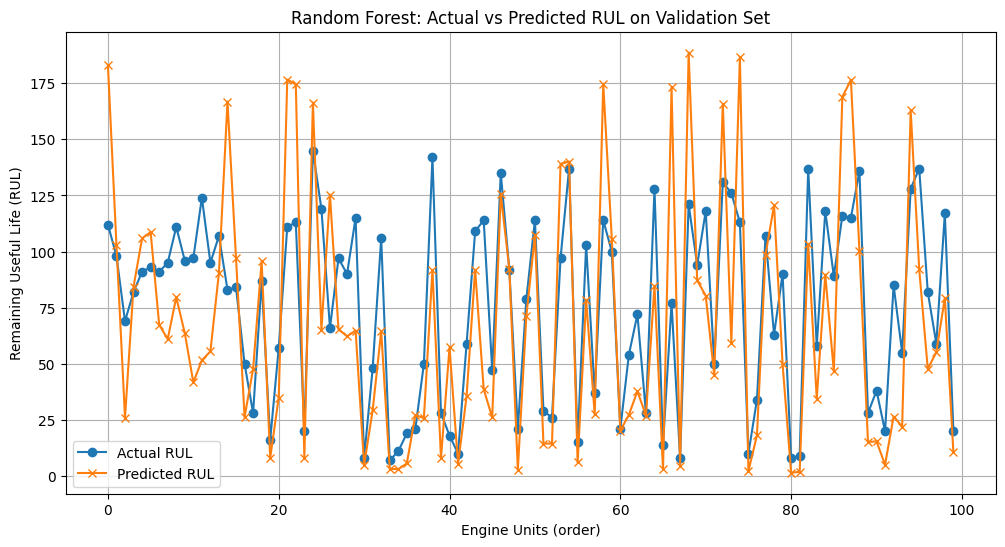

In [103]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train_s, y_train)


y_test_pred = rf_model.predict(X_test_s)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Testing Set Performance:")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"R2 Score: {r2_test:.2f}")

# Predict the RUL on the validation set using the trained model
y_valid_pred = rf_model.predict(X_valid_s)
print("Predicted RUL on Validation Set using Random Forest:")
print(y_valid_pred)

plt.figure(figsize=(12, 6))
plt.plot(y_valid, label='Actual RUL', marker='o')
plt.plot(y_valid_pred, label='Predicted RUL', marker='x')
plt.xlabel('Engine Units (order)')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title('Random Forest: Actual vs Predicted RUL on Validation Set')
plt.legend()
plt.grid(True)
plt.show()

In [104]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initializing the RFR
rf = RandomForestRegressor(random_state=42)

# Setup GridSearchCV with 3-fold cross-validation and negative MSE as the scoring metric
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=2)


grid_search.fit(X_train_s, y_train)

# Best hyperparameters and best estimator
print("Best Hyperparameters from GridSearchCV:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Hyperparameters from GridSearchCV: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 400}


In [105]:
# Evaluating the tuned model on the test set
y_test_pred_tuned = best_rf.predict(X_test_s)
mse_test_tuned = mean_squared_error(y_test, y_test_pred_tuned)
r2_test_tuned = r2_score(y_test, y_test_pred_tuned)
print("\nAfter Tuning - Test Set Performance:")
print(f"Mean Squared Error: {mse_test_tuned:.2f}")
print(f"R2 Score: {r2_test_tuned:.2f}")


After Tuning - Test Set Performance:
Mean Squared Error: 1935.53
R2 Score: 0.58


In [106]:
# Predict on the validation set using the tuned model
y_valid_pred_tuned = best_rf.predict(X_valid_s)
print("\nPredicted RUL on Validation Set (Tuned Random Forest):")
print(y_valid_pred_tuned)


Predicted RUL on Validation Set (Tuned Random Forest):
[178.88042523 102.82315111  29.94535283  83.0274555  104.91922937
 105.78294026  65.08493068  61.97481098  79.16678062  66.88662239
  42.31979008  50.36333563  56.01555196  94.27943557 174.14123959
  97.32964786  26.19039725  47.1870695  100.73455212   8.72736885
  35.33427725 160.37050687 175.93516542   8.04787956 167.76768569
  63.99945231 128.45452662  64.4063669   61.32522842  66.52134741
   5.31675997  28.62700028  68.02384652   2.74903161   2.68935853
   6.32525323  28.50878354  27.03947969  92.8107023    8.53042176
  59.32110074   4.60622295  38.68204248  91.51416368  40.47763147
  26.54574451 130.14227513  98.72753332   3.37511823  71.94366648
 102.99230383  14.28608309  14.24125341 133.7742152  135.79402119
   7.29984844  78.06327884  27.07787863 168.60627271 102.23277107
  17.93592931  27.18024621  36.02844007  26.95616822  83.76956154
   3.38872327 155.8965185    4.81218412 179.21213203  90.78686042
  79.32091774  45.91

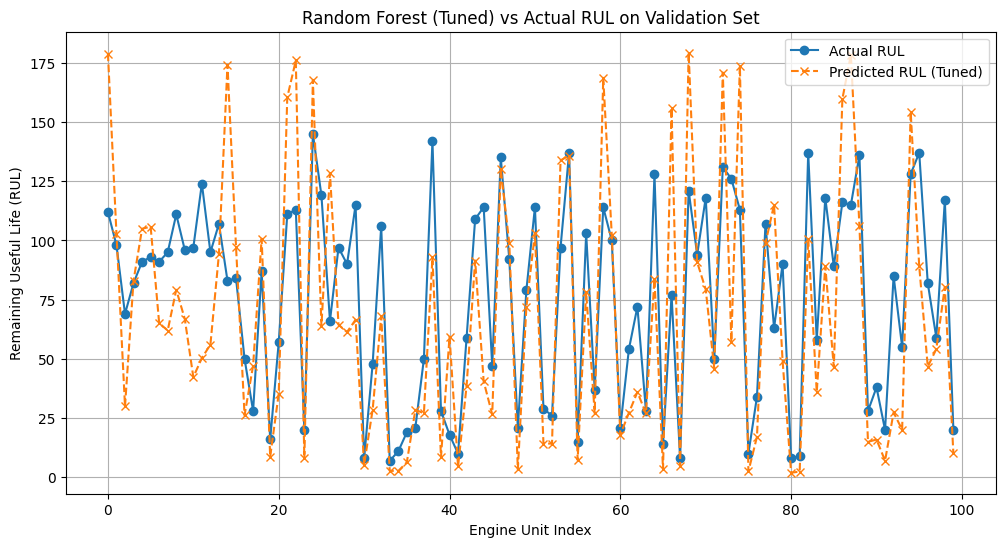

In [107]:
plt.figure(figsize=(12, 6))
engine_indices = np.arange(len(y_valid))  # Engine unit indices for x-axis

plt.plot(engine_indices, y_valid, marker='o', linestyle='-', label='Actual RUL')
plt.plot(engine_indices, y_valid_pred_tuned, marker='x', linestyle='--', label='Predicted RUL (Tuned)')
plt.xlabel('Engine Unit Index')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title('Random Forest (Tuned) vs Actual RUL on Validation Set')
plt.legend()
plt.grid(True)
plt.show()

In [108]:
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=300, random_state=42)

xgb_model.fit(X_train_s, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [109]:
# PREDICTIKIG USING XGBOOOST
y_test_pred_xgb = xgb_model.predict(X_test_s)

# PERFORMANCE METRIC ONT EST SET CALCULATION
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)
print("\nXGBoost Test Set Performance:")
print(f"Mean Squared Error: {mse_test_xgb:.2f}")
print(f"R2 Score: {r2_test_xgb:.2f}")


XGBoost Test Set Performance:
Mean Squared Error: 2537.74
R2 Score: 0.45



Predicted RUL on Validation Set (XGBoost):
[ 1.67579773e+02  2.35055733e+01  8.52722015e+01  6.64211349e+01
  5.47468758e+01  9.54503403e+01  7.23295364e+01  4.00299873e+01
  1.51830811e+02  8.04790573e+01  2.51429176e+01  5.85550575e+01
  8.03469391e+01  8.84905548e+01  2.07121353e+02  7.92014771e+01
  4.78762741e+01  3.69570465e+01  1.10557976e+02  6.91972494e+00
  8.74617920e+01  1.73149155e+02  1.45866287e+02  3.02137814e+01
  1.65797913e+02  2.52516956e+01  1.08066628e+02  5.35486336e+01
  6.94742737e+01  7.07047501e+01 -8.56474781e+00  8.94955826e+01
  5.47929611e+01  2.17541769e-01 -6.04517174e+00  2.25147939e+00
  2.08883076e+01  1.19419231e+01  1.01407219e+02  9.66046715e+00
  5.16041565e+01  4.58747196e+00  3.78302040e+01  1.92892990e+02
  2.61854439e+01  3.52994995e+01  9.61608276e+01  1.47279068e+02
  5.58230102e-01  1.02692490e+02  7.43892670e+01  1.42430563e+01
  1.20366688e+01  1.81644135e+02  1.74224564e+02  2.04507852e+00
  6.68547668e+01  3.84696426e+01  1.81244766e+

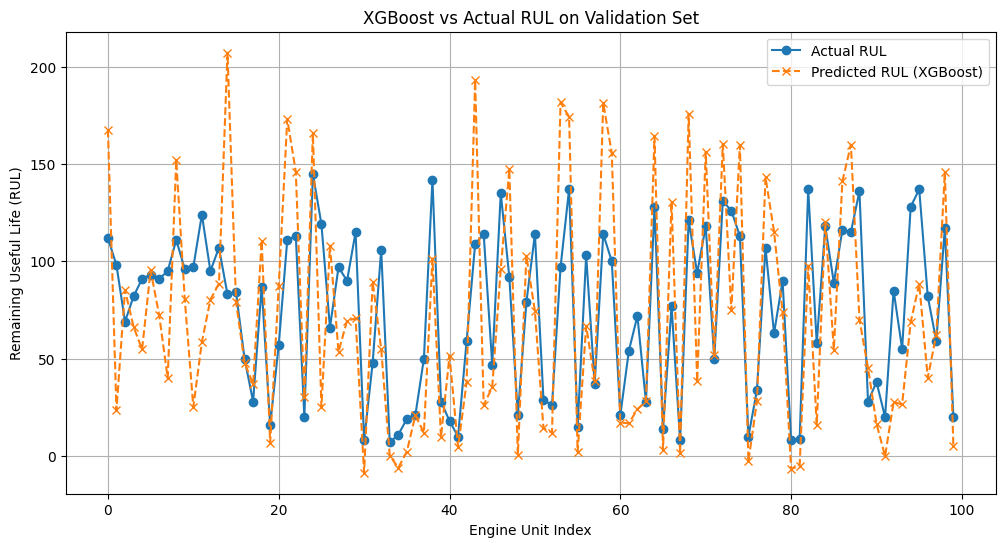

In [110]:

y_valid_pred_xgb = xgb_model.predict(X_valid_s)
print("\nPredicted RUL on Validation Set (XGBoost):")
print(y_valid_pred_xgb)

# Plot the Actual vs Predicted RUL for the validation set
plt.figure(figsize=(12, 6))
engine_indices = np.arange(len(y_valid)) 
plt.plot(engine_indices, y_valid, marker='o', linestyle='-', label='Actual RUL')
plt.plot(engine_indices, y_valid_pred_xgb, marker='x', linestyle='--', label='Predicted RUL (XGBoost)')
plt.xlabel('Engine Unit Index')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title('XGBoost vs Actual RUL on Validation Set')
plt.legend()
plt.grid(True)
plt.show()

In [111]:
def add_historical_features(df, window_size=10, lags=[1,2]):
    """
    Adds historical features (rolling means and lag features) for each sensor column to the given dataframe.
    The function groups by 'unit_number' to preserve the time-series order.
    
    Parameters:
      df: DataFrame to be augmented.
      window_size: Window size for rolling statistics.
      lags: List of time lags to add as features.
    
    Returns:
      Augmented DataFrame.
    """
    sensor_cols = ['s-' + str(i) for i in range(1, 22)]
    df_new = df.copy()
    
    def add_features(group):
        group = group.sort_values('time_cycles')
        for sensor in sensor_cols:
            # Rolling mean feature
            group[sensor + '_roll_mean'] = group[sensor].rolling(window=window_size, min_periods=1).mean()
            # Add lag features for each specified lag
            for lag in lags:
                group[sensor + f'_lag_{lag}'] = group[sensor].shift(lag)
        return group
    
    df_new = df_new.groupby('unit_number').apply(add_features)
    df_new.reset_index(drop=True, inplace=True)
    return df_new

# historical feature engg on training and validation datasets
train_hist = add_historical_features(train, window_size=10, lags=[1,2])
valid_hist = add_historical_features(valid, window_size=10, lags=[1,2])


print(train_hist.head())

   unit_number  time_cycles  setting_1  setting_2  setting_3     s-1     s-2  \
0            1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1            1            2     0.0019    -0.0003      100.0  518.67  642.15   
2            1            3    -0.0043     0.0003      100.0  518.67  642.35   
3            1            4     0.0007     0.0000      100.0  518.67  642.35   
4            1            5    -0.0019    -0.0002      100.0  518.67  642.37   

       s-3      s-4    s-5  ...  s-18_lag_2  s-19_roll_mean  s-19_lag_1  \
0  1589.70  1400.60  14.62  ...         NaN           100.0         NaN   
1  1591.82  1403.14  14.62  ...         NaN           100.0       100.0   
2  1587.99  1404.20  14.62  ...      2388.0           100.0       100.0   
3  1582.79  1401.87  14.62  ...      2388.0           100.0       100.0   
4  1582.85  1406.22  14.62  ...      2388.0           100.0       100.0   

   s-19_lag_2  s-20_roll_mean  s-20_lag_1  s-20_lag_2  s-21_roll_mea

In [112]:

drop_labels = index_names + setting_names


X_all_hist = train_hist.drop(columns=drop_labels).copy()  
y_all_hist = X_all_hist['RUL'] 
X_all_hist.drop(columns=['RUL'], inplace=True)

# splitting enriched training data into training and testing set
from sklearn.model_selection import train_test_split
X_train_hist, X_test_hist, y_train_hist, y_test_hist = train_test_split(X_all_hist, y_all_hist, test_size=0.3, random_state=42)


from sklearn.preprocessing import MinMaxScaler
scaler_hist = MinMaxScaler()
X_train_hist_scaled = scaler_hist.fit_transform(X_train_hist)
X_test_hist_scaled = scaler_hist.transform(X_test_hist)


X_valid_hist = valid_hist.groupby('unit_number').last().reset_index().drop(columns=drop_labels)
X_valid_hist_scaled = scaler_hist.transform(X_valid_hist)

print("Enriched X_valid_hist_scaled shape:", X_valid_hist_scaled.shape)
print("y_valid shape:", y_valid.shape)

Enriched X_valid_hist_scaled shape: (100, 84)
y_valid shape: (100,)



XGBoost (Historical Features) Test Set Performance:
Mean Squared Error: 1245.16
R2 Score: 0.73

Predicted RUL on Validation Set (XGBoost with Historical Features):
[125.195404  199.1934     66.149124  125.04128    91.42975   129.43762
 109.17245   108.28539   145.23964   103.711784  106.86547   104.255
 101.4605    120.36999   153.62793   114.93817    57.37892    90.03968
 141.2703     17.493473   54.388744  105.340775  218.03467    13.177261
 164.46594   150.85098   112.31644    91.84168   131.4405    128.66708
  12.327378   46.06294   156.13249     9.43688     5.665999   21.577023
  99.15096    54.879642  105.25392    35.544598   54.85778    15.279989
  80.8457    121.28537    54.90362    35.279366  136.29274   131.13622
  19.793488  123.27941    87.01973    23.629436   41.615604  151.89928
 157.30664    11.071307  133.38739    50.07888   133.02843   120.409775
  53.83848    48.373745   91.87384    42.287907  166.84024    20.07928
 173.49998    15.830153  118.59101   140.03098   143

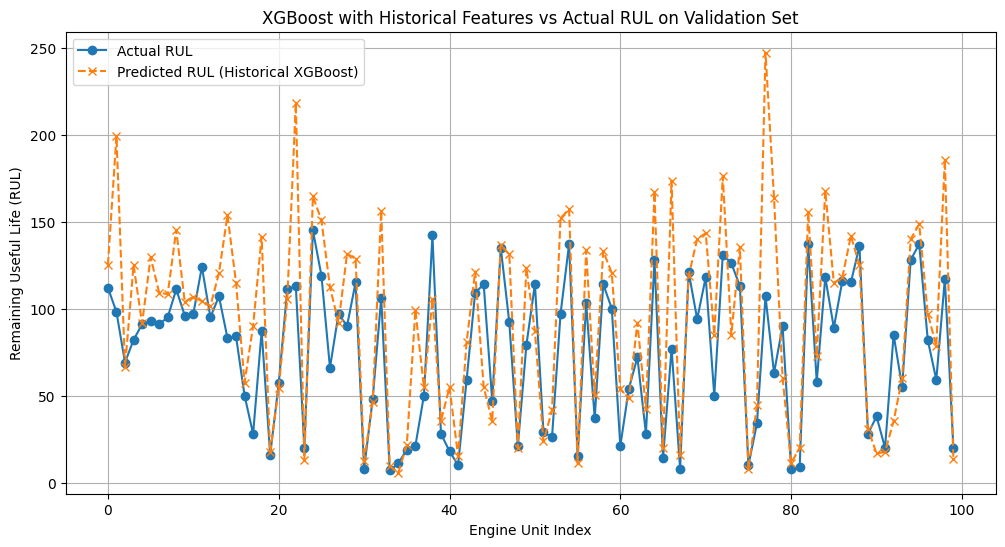

In [113]:
from xgboost import XGBRegressor

# TRAINING MODEL
xgb_model_hist = XGBRegressor(objective='reg:squarederror', n_estimators=300, random_state=42)
xgb_model_hist.fit(X_train_hist_scaled, y_train_hist)

# RUNNINH ON TEST SET
y_test_pred_xgb_hist = xgb_model_hist.predict(X_test_hist_scaled)
mse_test_xgb_hist = mean_squared_error(y_test_hist, y_test_pred_xgb_hist)
r2_test_xgb_hist = r2_score(y_test_hist, y_test_pred_xgb_hist)
print("\nXGBoost (Historical Features) Test Set Performance:")
print(f"Mean Squared Error: {mse_test_xgb_hist:.2f}")
print(f"R2 Score: {r2_test_xgb_hist:.2f}")

# PREDICTION ON VALIDATION SET
y_valid_pred_xgb_hist = xgb_model_hist.predict(X_valid_hist_scaled)
print("\nPredicted RUL on Validation Set (XGBoost with Historical Features):")
print(y_valid_pred_xgb_hist)

# PLOTTING
plt.figure(figsize=(12, 6))
engine_indices = np.arange(len(y_valid))  # Use engine indices on x-axis
plt.plot(engine_indices, y_valid, marker='o', linestyle='-', label='Actual RUL')
plt.plot(engine_indices, y_valid_pred_xgb_hist, marker='x', linestyle='--', label='Predicted RUL (Historical XGBoost)')
plt.xlabel('Engine Unit Index')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title('XGBoost with Historical Features vs Actual RUL on Validation Set')
plt.legend()
plt.grid(True)
plt.show()

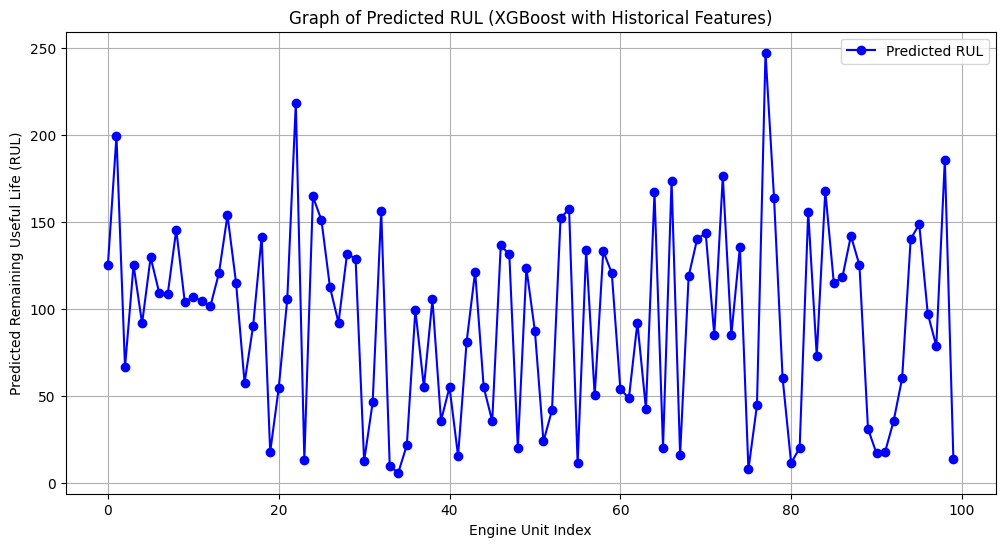

In [114]:
# ONLY PREDICTED RUL
plt.figure(figsize=(12, 6))
engine_indices = np.arange(len(y_valid))  # X-axis: engine unit indices
plt.plot(engine_indices, y_valid_pred_xgb_hist, marker='o', linestyle='-', color='blue', label='Predicted RUL')
plt.xlabel('Engine Unit Index')
plt.ylabel('Predicted Remaining Useful Life (RUL)')
plt.title('Graph of Predicted RUL (XGBoost with Historical Features)')
plt.legend()
plt.grid(True)
plt.show()

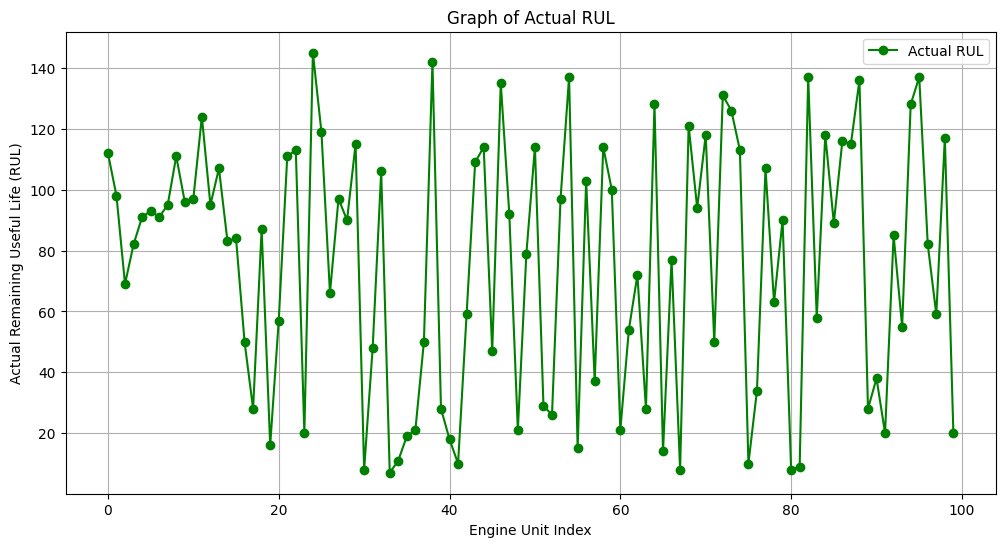

In [115]:
# ONLY RUL
plt.figure(figsize=(12, 6))
engine_indices = np.arange(len(y_valid))  # X-axis: engine unit indices
plt.plot(engine_indices, y_valid, marker='o', linestyle='-', color='green', label='Actual RUL')
plt.xlabel('Engine Unit Index')
plt.ylabel('Actual Remaining Useful Life (RUL)')
plt.title('Graph of Actual RUL')
plt.legend()
plt.grid(True)
plt.show()

Accuracy Metrics on Validation Set:
RMSE: 36.85
MAE : 25.61
R²  : 0.21


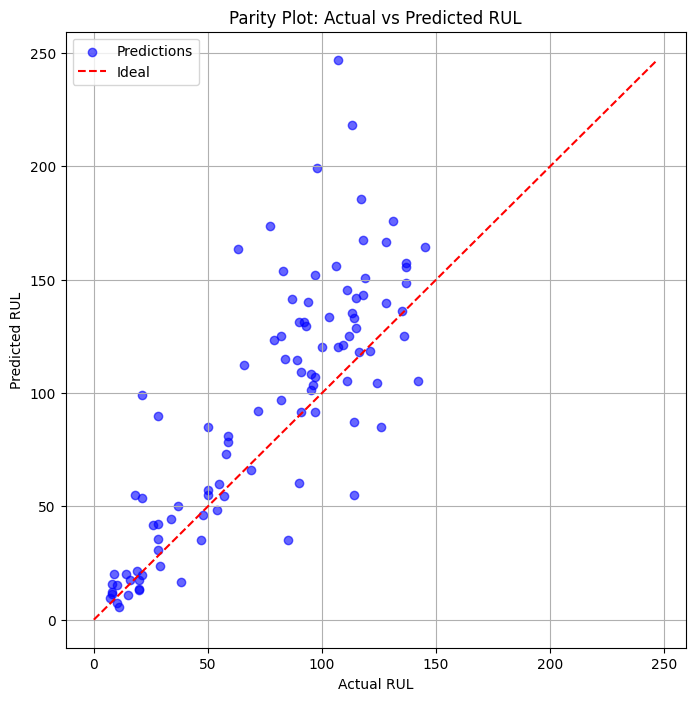

In [116]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ERROR METRICS CALCULATIONZZZZ
rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred_xgb_hist))
mae = mean_absolute_error(y_valid, y_valid_pred_xgb_hist)
r2 = r2_score(y_valid, y_valid_pred_xgb_hist)

print("Accuracy Metrics on Validation Set:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.2f}")

# PARTY PLOT
plt.figure(figsize=(8,8))
plt.scatter(y_valid, y_valid_pred_xgb_hist, color='blue', alpha=0.6, label="Predictions")

# PLOTTING IDEAL LINE
max_val = max(max(y_valid), max(y_valid_pred_xgb_hist))
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label="Ideal")

plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Parity Plot: Actual vs Predicted RUL")
plt.legend()
plt.grid(True)
plt.show()

In [117]:
def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100


y_valid_array = np.array(y_valid)


mape = mean_absolute_percentage_error(y_valid_array, y_valid_pred_xgb_hist)
accuracy_percent = 100 - mape

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Derived Accuracy (100 - MAPE): {accuracy_percent:.2f}%")

Mean Absolute Percentage Error (MAPE): 42.57%
Derived Accuracy (100 - MAPE): 57.43%


In [118]:
# ADDING SENSOR AGGREGATIONS
def add_sensor_aggregations(df):
    # Aggregated Temperature: using sensors s-2, s-3, s-4 (assumed to measure temperature)
    df['temp_avg'] = df[['s-2', 's-3', 's-4']].mean(axis=1)
    # Aggregated Pressure: using sensors s-5, s-6, s-7 (assumed to measure pressure)
    df['pressure_avg'] = df[['s-5', 's-6', 's-7']].mean(axis=1)
    # Sensor Difference: difference between s-8 and s-9 (could capture a speed or flow difference)
    df['speed_diff'] = df['s-8'] - df['s-9']
    return df

# APPLY SENSOR AGGREGATIONS TO THE ORIGINAL TRAINING DATA and VALIDATION DATA
train_agg = add_sensor_aggregations(train.copy())
valid_agg = add_sensor_aggregations(valid.copy())

print("Train data (with sensor aggregations) sample:")
print(train_agg.head())

Train data (with sensor aggregations) sample:
   unit_number  time_cycles  setting_1  setting_2  setting_3     s-1     s-2  \
0            1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1            1            2     0.0019    -0.0003      100.0  518.67  642.15   
2            1            3    -0.0043     0.0003      100.0  518.67  642.35   
3            1            4     0.0007     0.0000      100.0  518.67  642.35   
4            1            5    -0.0019    -0.0002      100.0  518.67  642.37   

       s-3      s-4    s-5  ...  s-16  s-17  s-18   s-19   s-20     s-21  RUL  \
0  1589.70  1400.60  14.62  ...  0.03   392  2388  100.0  39.06  23.4190  191   
1  1591.82  1403.14  14.62  ...  0.03   392  2388  100.0  39.00  23.4236  190   
2  1587.99  1404.20  14.62  ...  0.03   390  2388  100.0  38.95  23.3442  189   
3  1582.79  1401.87  14.62  ...  0.03   392  2388  100.0  38.88  23.3739  188   
4  1582.85  1406.22  14.62  ...  0.03   393  2388  100.0  38.90  23.

In [119]:
# ADDING HISTORICAL DATA

train_hist_agg = add_historical_features(train_agg, window_size=10, lags=[1,2])
valid_hist_agg = add_historical_features(valid_agg, window_size=10, lags=[1,2])

print("Train data after adding historical features (on aggregated data):")
print(train_hist_agg.head())

Train data after adding historical features (on aggregated data):
   unit_number  time_cycles  setting_1  setting_2  setting_3     s-1     s-2  \
0            1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1            1            2     0.0019    -0.0003      100.0  518.67  642.15   
2            1            3    -0.0043     0.0003      100.0  518.67  642.35   
3            1            4     0.0007     0.0000      100.0  518.67  642.35   
4            1            5    -0.0019    -0.0002      100.0  518.67  642.37   

       s-3      s-4    s-5  ...  s-18_lag_2  s-19_roll_mean  s-19_lag_1  \
0  1589.70  1400.60  14.62  ...         NaN           100.0         NaN   
1  1591.82  1403.14  14.62  ...         NaN           100.0       100.0   
2  1587.99  1404.20  14.62  ...      2388.0           100.0       100.0   
3  1582.79  1401.87  14.62  ...      2388.0           100.0       100.0   
4  1582.85  1406.22  14.62  ...      2388.0           100.0       100.0   

  

In [120]:
#PREPARING ENRICHED DATA SET
drop_labels = index_names + setting_names  # NON FEATURE COLS

# ENRICHING DATA WITH HISTORICAL DATA
X_all_hist_agg = train_hist_agg.drop(columns=drop_labels).copy()  # All sensor, aggregation, rolling & lag features included
y_all_hist_agg = X_all_hist_agg['RUL']  # Extract target
X_all_hist_agg.drop(columns=['RUL'], inplace=True)

# SPLITTING INTO TRAINING AND TESTING
X_train_enriched, X_test_enriched, y_train_enriched, y_test_enriched = train_test_split(
    X_all_hist_agg, y_all_hist_agg, test_size=0.3, random_state=42)

# SCALING 
scaler_enriched = MinMaxScaler()
X_train_enriched_scaled = scaler_enriched.fit_transform(X_train_enriched)
X_test_enriched_scaled = scaler_enriched.transform(X_test_enriched)

# TAKING LAST RECORD FOR VALIDATION SET
X_valid_enriched = valid_hist_agg.groupby('unit_number').last().reset_index().drop(columns=drop_labels)
X_valid_enriched_scaled = scaler_enriched.transform(X_valid_enriched)

print("Enriched validation features shape:", X_valid_enriched_scaled.shape)
print("Enriched training features shape:", X_train_enriched_scaled.shape)

Enriched validation features shape: (100, 87)
Enriched training features shape: (14441, 87)


In [121]:
#TRAINING ON IMPROVED DATA

from xgboost import XGBRegressor

#TRAINING XGBOOST MODEL
xgb_model_enriched = XGBRegressor(objective='reg:squarederror', n_estimators=300, random_state=42)
xgb_model_enriched.fit(X_train_enriched_scaled, y_train_enriched)

# TEST SET EVALUATION
y_test_pred_enriched = xgb_model_enriched.predict(X_test_enriched_scaled)
mse_test_enriched = mean_squared_error(y_test_enriched, y_test_pred_enriched)
r2_test_enriched = r2_score(y_test_enriched, y_test_pred_enriched)
print("\nXGBoost (Enriched Features) Test Set Performance:")
print(f"Mean Squared Error: {mse_test_enriched:.2f}")
print(f"R2 Score: {r2_test_enriched:.2f}")

# VALIDATION SET EVALUATION
y_valid_pred_enriched = xgb_model_enriched.predict(X_valid_enriched_scaled)
print("\nPredicted RUL on Validation Set (XGBoost with Enriched Features):")
print(y_valid_pred_enriched)


XGBoost (Enriched Features) Test Set Performance:
Mean Squared Error: 1215.27
R2 Score: 0.73

Predicted RUL on Validation Set (XGBoost with Enriched Features):
[152.75711  144.75307   61.305058  82.925575 150.11021  175.35912
 142.63684   94.56235  144.6436   131.48227  106.51725   98.20018
  77.673294 127.26193  156.64685  106.93754   55.56245   92.49041
 124.19574   17.104755  69.309975  94.335266 197.32181   14.576845
 171.99503  115.97189   74.542885  95.4525   103.84006  127.08823
   9.830797  49.80562  140.59114    9.631189   6.532235  22.364063
  73.03446   49.85699  162.79109   35.00954   51.47294   26.120878
  96.76166  142.94751   54.789642  45.099598 129.94408  128.33826
  13.88274  121.654366  99.47675   26.083214  42.66377  160.10669
 113.285576  17.482363 123.25508   48.076412 148.90604  158.10234
  45.51198   50.935772  79.5939    46.33393  168.42032   14.254057
 110.61388   10.380182 129.955    137.7126   130.99731   71.20052
 165.82974   81.824524 137.0928     9.60387

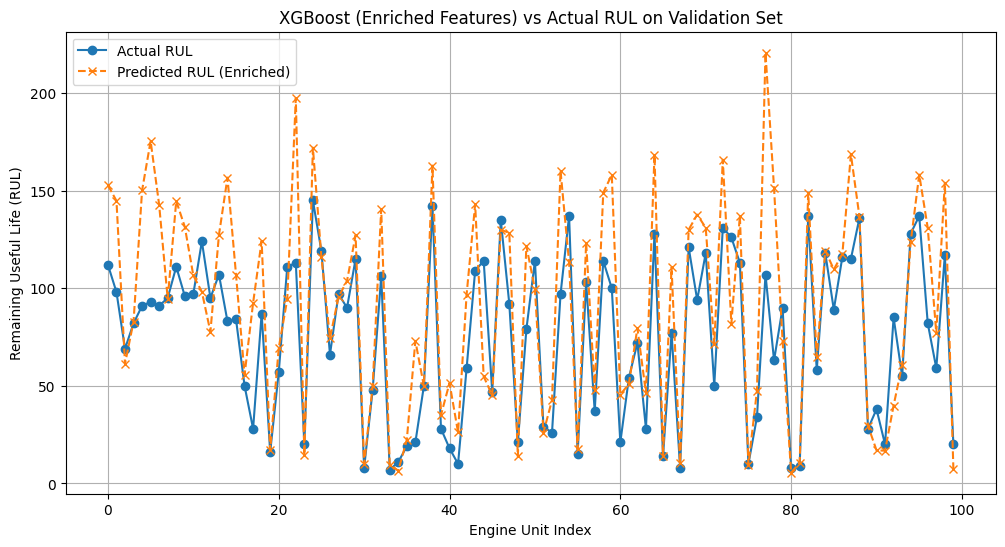

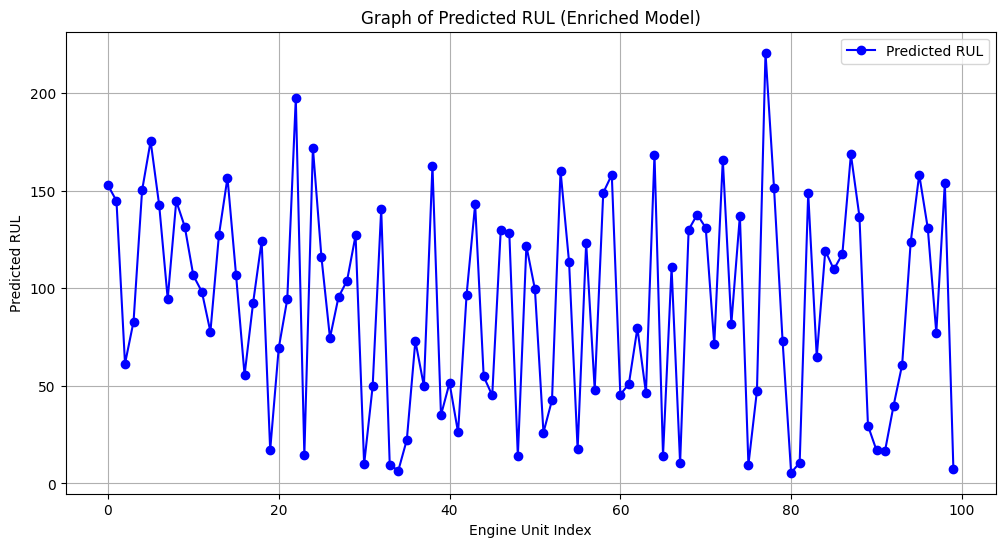

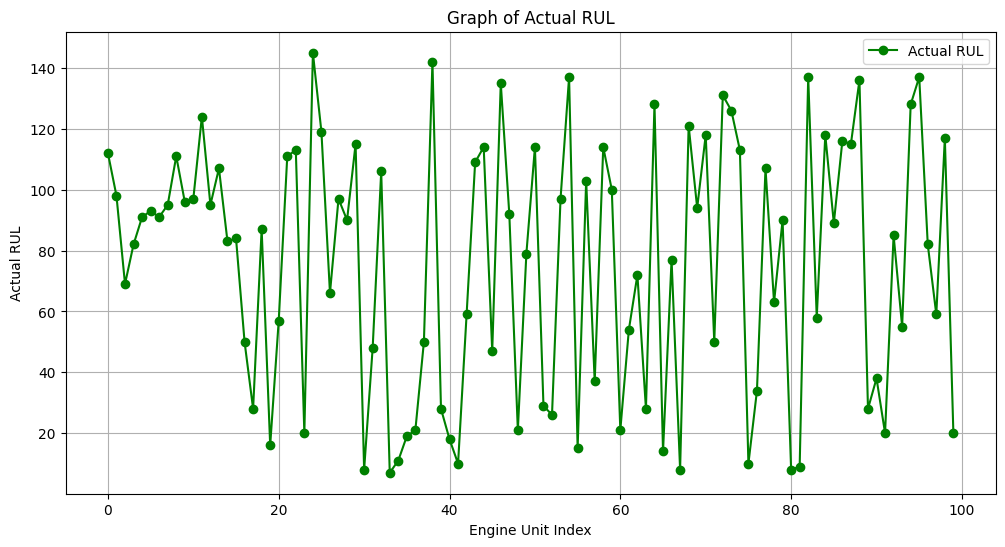


Enriched Model Accuracy Metrics on Validation Set:
RMSE: 32.90
MAE : 23.44
R²  : 0.37


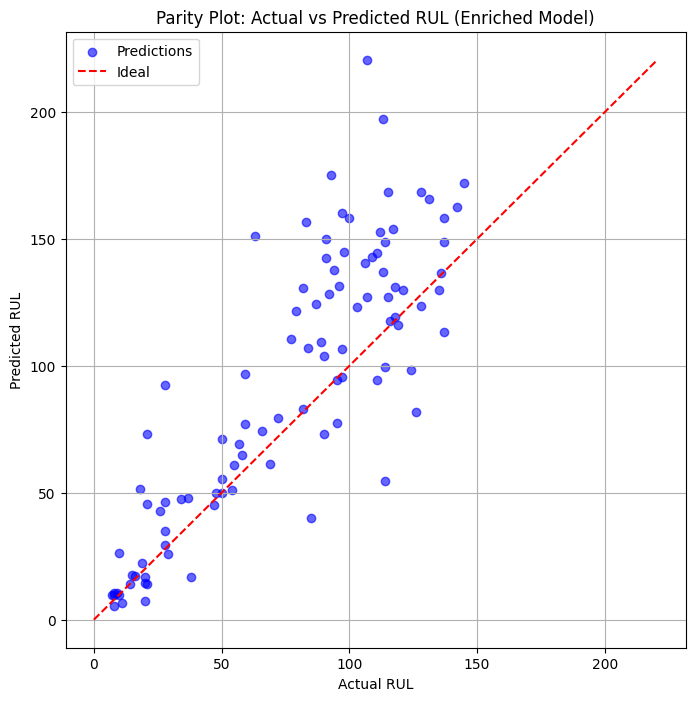


Mean Absolute Percentage Error (MAPE): 37.37%
Derived Accuracy (100 - MAPE): 62.63%


In [122]:
# ENRICHED THE DATA AND NOW PLOTTING PREDICTED V/S ACTUAL RUL GRAPH
plt.figure(figsize=(12, 6))
engine_indices = np.arange(len(y_valid))  # Engine unit indices used on x-axis
plt.plot(engine_indices, y_valid, marker='o', linestyle='-', label='Actual RUL')
plt.plot(engine_indices, y_valid_pred_enriched, marker='x', linestyle='--', label='Predicted RUL (Enriched)')
plt.xlabel('Engine Unit Index')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title('XGBoost (Enriched Features) vs Actual RUL on Validation Set')
plt.legend()
plt.grid(True)
plt.show()

# ONLY PREDICTED RUL GRAPH
plt.figure(figsize=(12, 6))
plt.plot(engine_indices, y_valid_pred_enriched, marker='o', linestyle='-', color='blue', label='Predicted RUL')
plt.xlabel('Engine Unit Index')
plt.ylabel('Predicted RUL')
plt.title('Graph of Predicted RUL (Enriched Model)')
plt.legend()
plt.grid(True)
plt.show()

# ONLY RUL GRAPH
plt.figure(figsize=(12, 6))
plt.plot(engine_indices, y_valid, marker='o', linestyle='-', color='green', label='Actual RUL')
plt.xlabel('Engine Unit Index')
plt.ylabel('Actual RUL')
plt.title('Graph of Actual RUL')
plt.legend()
plt.grid(True)
plt.show()

# SETTING ACCURACY METRICS
rmse_enriched = np.sqrt(mean_squared_error(y_valid, y_valid_pred_enriched))
mae_enriched = mean_absolute_error(y_valid, y_valid_pred_enriched)
r2_enriched = r2_score(y_valid, y_valid_pred_enriched)
print("\nEnriched Model Accuracy Metrics on Validation Set:")
print(f"RMSE: {rmse_enriched:.2f}")
print(f"MAE : {mae_enriched:.2f}")
print(f"R²  : {r2_enriched:.2f}")

# PLOTTING
plt.figure(figsize=(8,8))
plt.scatter(y_valid, y_valid_pred_enriched, color='blue', alpha=0.6, label="Predictions")
max_val_enriched = max(max(y_valid), max(y_valid_pred_enriched))
plt.plot([0, max_val_enriched], [0, max_val_enriched], color='red', linestyle='--', label="Ideal")
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Parity Plot: Actual vs Predicted RUL (Enriched Model)")
plt.legend()
plt.grid(True)
plt.show()

# COMPUTING ACCURACY
def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # small number to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

mape_enriched = mean_absolute_percentage_error(np.array(y_valid), y_valid_pred_enriched)
accuracy_percent_enriched = 100 - mape_enriched
print(f"\nMean Absolute Percentage Error (MAPE): {mape_enriched:.2f}%")
print(f"Derived Accuracy (100 - MAPE): {accuracy_percent_enriched:.2f}%")